In [ ]:


import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)


import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


/kaggle/input/zomato-dataset/zomato.csv


# # Loading Dataset****

In [2]:
df=pd.read_csv("/kaggle/input/zomato-dataset/zomato.csv")

In [3]:
df.sample(5)

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
39551,https://www.zomato.com/bangalore/the-waffles-h...,"3rd Floor, Food Court, Mantri Square Mall, Sam...",The Waffles Hut,Yes,No,3.6 /5,17,+91 8310457370,Malleshwaram,Dessert Parlor,NaN,Desserts,400,"[('Rated 4.0', ""RATED\n I was looking to eat ...","['Belgian Chocolate Spread Waffle', 'Dry Fruit...",Delivery,Malleshwaram
8876,https://www.zomato.com/bangalore/ice-cream-wor...,"542, Shravanthi Topaz, 10th East Main Road, 38...",Ice Cream Works,Yes,No,4.1/5,192,+91 9916701531\r\r\n+91 9663317258,Jayanagar,Dessert Parlor,"Paan Ice Cream, Madagascar Chocolate, Faluda, ...","Desserts, Ice Cream",300,"[('Rated 5.0', 'RATED\n Feel like having an e...",[],Delivery,BTM
13078,https://www.zomato.com/bangalore/siddique-kaba...,"St. Johns Church Road, Near Coles Park, Frazer...",Siddique Kabab Centre,Yes,No,3.9/5,430,+91 9845077733,Frazer Town,Casual Dining,"Chicken Grill, Chicken Biryani, Rolls, Ghee Ri...","Mughlai, Kebab, Chinese",550,"[('Rated 4.0', 'RATED\n Before I start try th...",[],Dine-out,Church Street
33302,https://www.zomato.com/bangalore/cheers-pub-ba...,"23, 1st Floor, Gowri Annex, 80ft Road, ST Bed,...",Cheers Pub Bar & Restro,No,Yes,NEW,0,080 49653176,Koramangala 4th Block,"Pub, Bar","Cocktails, Brownie, Verdure Pizza, Veg Bao, Fi...","Continental, Finger Food, Pizza, North Indian,...","1,100","[('Rated 5.0', ""RATED\n I have never had so m...",[],Delivery,Koramangala 6th Block
32819,https://www.zomato.com/bangalore/tiwaris-ghee-...,"242, 7th Cross Rd, Mico Layout, Stage 2, BTM, ...",Tiwari's Ghee Paratha And Chaats,Yes,No,NaN,0,+91 9844726826\r\n+91 9844078000,BTM,Quick Bites,NaN,"North Indian, Street Food",200,"[('Rated 1.0', 'RATED\n Found ants in my lass...","['2 Aloo Paratha Combo', '2 Aloo Pyaz Combo', ...",Delivery,Koramangala 6th Block


# Remove unwanted columns

In [4]:
columns_to_drop=['url','address','phone','dish_liked','menu_item','location','reviews_list','menu_item']
df.drop(columns=columns_to_drop,inplace=True)

In [5]:
df.sample(5)

,name,online_order,book_table,rate,votes,rest_type,cuisines,approx_cost(for two people),listed_in(type),listed_in(city)
20701,Sri Brahmi Kuteera,No,No,NaN,0,Quick Bites,South Indian,150,Delivery,Jayanagar
10566,The Cake Lair,Yes,No,3.5/5,9,Quick Bites,"Bakery, Fast Food, Beverages",600,Dine-out,BTM
2322,Anju's Cafe,No,No,3.4/5,6,Cafe,"Cafe, North Indian",600,Dine-out,Bannerghatta Road
45487,Navab's,Yes,No,NaN,0,Delivery,"North Indian, Chinese",600,Delivery,Old Airport Road
3666,VEGeatz,Yes,No,3.4/5,19,Quick Bites,"South Indian, North Indian",200,Dine-out,Basavanagudi


# Renaming the columns

In [6]:
df.rename(columns={'name':"Name",'rate':'Rating','votes':'Customer_rated',
                   'approx_cost(for two people)':'Cost_for_two','listed_in(type)':'Service_Category','listed_in(city)':'City'},inplace=True)

In [7]:
df.head(5)

,Name,online_order,book_table,Rating,Customer_rated,rest_type,cuisines,Cost_for_two,Service_Category,City
0,Jalsa,Yes,Yes,4.1/5,775,Casual Dining,"North Indian, Mughlai, Chinese",800,Buffet,Banashankari
1,Spice Elephant,Yes,No,4.1/5,787,Casual Dining,"Chinese, North Indian, Thai",800,Buffet,Banashankari
2,San Churro Cafe,Yes,No,3.8/5,918,"Cafe, Casual Dining","Cafe, Mexican, Italian",800,Buffet,Banashankari
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,Quick Bites,"South Indian, North Indian",300,Buffet,Banashankari
4,Grand Village,No,No,3.8/5,166,Casual Dining,"North Indian, Rajasthani",600,Buffet,Banashankari


# Remove Duplicates

In [8]:
df.duplicated().sum()
df.drop_duplicates(inplace=True)

In [9]:
df.head(5)

,Name,online_order,book_table,Rating,Customer_rated,rest_type,cuisines,Cost_for_two,Service_Category,City
0,Jalsa,Yes,Yes,4.1/5,775,Casual Dining,"North Indian, Mughlai, Chinese",800,Buffet,Banashankari
1,Spice Elephant,Yes,No,4.1/5,787,Casual Dining,"Chinese, North Indian, Thai",800,Buffet,Banashankari
2,San Churro Cafe,Yes,No,3.8/5,918,"Cafe, Casual Dining","Cafe, Mexican, Italian",800,Buffet,Banashankari
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,Quick Bites,"South Indian, North Indian",300,Buffet,Banashankari
4,Grand Village,No,No,3.8/5,166,Casual Dining,"North Indian, Rajasthani",600,Buffet,Banashankari


# Split Rating Column

In [10]:
df['Rating_out_of_5']=df['Rating'].str.extract(r'(\d+.\d+|\d+)',expand=True)
df['Rating_out_of_5']=pd.to_numeric(df['Rating_out_of_5'],errors='coerce')

In [11]:
df.drop(columns=['Rating'],inplace=True)

In [12]:
df.head(5)

,Name,online_order,book_table,Customer_rated,rest_type,cuisines,Cost_for_two,Service_Category,City,Rating_out_of_5
0,Jalsa,Yes,Yes,775,Casual Dining,"North Indian, Mughlai, Chinese",800,Buffet,Banashankari,4.1
1,Spice Elephant,Yes,No,787,Casual Dining,"Chinese, North Indian, Thai",800,Buffet,Banashankari,4.1
2,San Churro Cafe,Yes,No,918,"Cafe, Casual Dining","Cafe, Mexican, Italian",800,Buffet,Banashankari,3.8
3,Addhuri Udupi Bhojana,No,No,88,Quick Bites,"South Indian, North Indian",300,Buffet,Banashankari,3.7
4,Grand Village,No,No,166,Casual Dining,"North Indian, Rajasthani",600,Buffet,Banashankari,3.8


# Clean rest_type column

In [13]:
df['rest_type']=df['rest_type'].str.replace('Cafee','Cafe')

In [14]:
df.loc[df['rest_type'].isna() & df['Service_Category'].str.contains('Delivery', na=False), 'rest_type'] = 'Quick Bites'
df.loc[df['rest_type'].isna() & df['Service_Category'].str.contains('Dine-out', na=False), 'rest_type'] = 'Casual Dining'
df.loc[df['rest_type'].isna() & df['Service_Category'].str.contains('Cafes', na=False), 'rest_type'] = 'Cafe'
df.loc[df['rest_type'].isna() & df['Service_Category'].str.contains('Desserts', na=False), 'rest_type'] = 'Dessert Parlor'
df.loc[df['rest_type'].isna() & df['Service_Category'].str.contains('Drinks', na=False), 'rest_type'] = 'Pub,Bar'
df.loc[df['rest_type'].isna() & df['Service_Category'].str.contains('Buffet', na=False), 'rest_type'] = 'Buffet'
df.loc[df['rest_type'].isna() & df['Service_Category'].str.contains('Pubs and bars', na=False), 'rest_type'] = 'Pub,Bar'


In [15]:
df.head(5)

,Name,online_order,book_table,Customer_rated,rest_type,cuisines,Cost_for_two,Service_Category,City,Rating_out_of_5
0,Jalsa,Yes,Yes,775,Casual Dining,"North Indian, Mughlai, Chinese",800,Buffet,Banashankari,4.1
1,Spice Elephant,Yes,No,787,Casual Dining,"Chinese, North Indian, Thai",800,Buffet,Banashankari,4.1
2,San Churro Cafe,Yes,No,918,"Cafe, Casual Dining","Cafe, Mexican, Italian",800,Buffet,Banashankari,3.8
3,Addhuri Udupi Bhojana,No,No,88,Quick Bites,"South Indian, North Indian",300,Buffet,Banashankari,3.7
4,Grand Village,No,No,166,Casual Dining,"North Indian, Rajasthani",600,Buffet,Banashankari,3.8


# Fill missing values for Cost_for_two column

In [16]:
df['Cost_for_two']=df['Cost_for_two'].str.replace(',','')
df['Cost_for_two']=pd.to_numeric(df['Cost_for_two'],errors='coerce')

In [17]:
df['Cost_for_two'] = df.groupby(['City', 'rest_type'])['Cost_for_two'].transform(lambda x: x.fillna(x.median()))
df['Cost_for_two'] = df.groupby(['City', 'Service_Category'])['Cost_for_two'].transform(lambda x: x.fillna(x.median()))

# fill cuisines column

In [18]:
df['cuisines'] = df['cuisines'].fillna(df.groupby(['City', 'rest_type'])['cuisines'].transform(lambda x: x.mode()[0] if not x.mode().empty else np.nan))

In [19]:
df['cuisines'] = df['cuisines'].fillna(df.groupby(['City', 'Service_Category'])['cuisines'].transform(lambda x: x.mode()[0] if not x.mode().empty else np.nan))

In [20]:
df.head(5)

,Name,online_order,book_table,Customer_rated,rest_type,cuisines,Cost_for_two,Service_Category,City,Rating_out_of_5
0,Jalsa,Yes,Yes,775,Casual Dining,"North Indian, Mughlai, Chinese",800.0,Buffet,Banashankari,4.1
1,Spice Elephant,Yes,No,787,Casual Dining,"Chinese, North Indian, Thai",800.0,Buffet,Banashankari,4.1
2,San Churro Cafe,Yes,No,918,"Cafe, Casual Dining","Cafe, Mexican, Italian",800.0,Buffet,Banashankari,3.8
3,Addhuri Udupi Bhojana,No,No,88,Quick Bites,"South Indian, North Indian",300.0,Buffet,Banashankari,3.7
4,Grand Village,No,No,166,Casual Dining,"North Indian, Rajasthani",600.0,Buffet,Banashankari,3.8


# Fill rating column

In [21]:
df['Rating_out_of_5'] = df.groupby(['City', 'cuisines','rest_type'])['Rating_out_of_5'].transform(lambda x: x.fillna(x.median()))

In [22]:
df['Rating_out_of_5'] = df.groupby(['City'])['Rating_out_of_5'].transform(lambda x: x.fillna(x.median()))

# Final Touch and Rearrangement

In [23]:
order=['Name','City','rest_type','cuisines','Cost_for_two','Rating_out_of_5','Customer_rated','Service_Category','online_order','book_table']
df=df[order]

In [24]:
df.rename(columns={'Name':'Restaurant_Name','rest_type':'Restaurant_Type','cuisines':'Cuisines','Cost_for_two':'Cost_for_two','Rating_out_of_5':'Rating_out_of_5','Customer_rated':'Customer_rated','Service_Category':'Service_Category','online_order':'Online_Order','book_table':'Book_Table'},inplace=True)

In [25]:
df.sample(5)

,Restaurant_Name,City,Restaurant_Type,Cuisines,Cost_for_two,Rating_out_of_5,Customer_rated,Service_Category,Online_Order,Book_Table
8822,Paani Kum Chai,BTM,Beverage Shop,"Tea, Beverages",100.0,3.7,0,Delivery,Yes,No
14851,Ambur Star Briyani,Frazer Town,Casual Dining,"North Indian, Chinese, Biryani",500.0,3.7,17,Delivery,Yes,No
2950,Dal Tadkaa,Basavanagudi,Casual Dining,North Indian,500.0,2.5,247,Delivery,Yes,No
37704,70 Brigade - Iris Hotel,Lavelle Road,Casual Dining,"Chinese, North Indian, Pizza",1000.0,3.9,105,Buffet,No,Yes
28583,V.S. Garden Restaurant,Koramangala 4th Block,Casual Dining,"North Indian, Chinese",800.0,3.5,17,Dine-out,No,No


### Analysis

In [26]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Bar_Chart --> Restaurants offering online dilevery vs those that don't.

To provide a quick and easy visual comparison of how many restaurants provide online delivery.

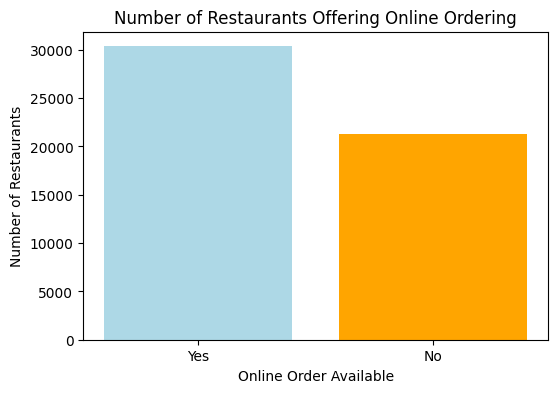

In [27]:
online_order_counts = df['Online_Order'].value_counts()

colors = ['lightblue', 'orange']
plt.figure(figsize=(6, 4))
plt.bar(online_order_counts.index,online_order_counts.values,color=colors)
plt.xlabel("Online Order Available")
plt.ylabel("Number of Restaurants")
plt.title("Number of Restaurants Offering Online Ordering")
plt.show()

# Bar_Chart --> Restaurants offering Table Booking vs those that don't.

To provide a quick and easy visual comparison of how many restaurants provide Table Booking.

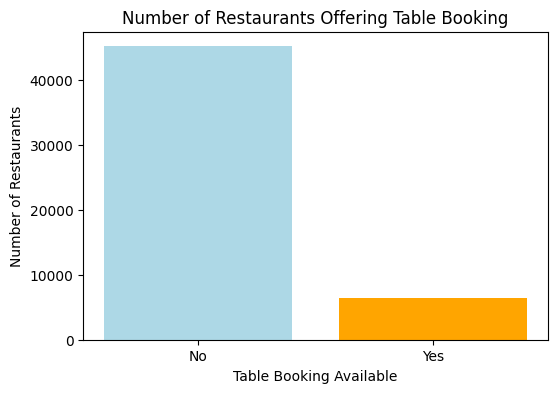

In [28]:
table_booking_counts = df['Book_Table'].value_counts()

colors = ['lightblue', 'orange']
plt.figure(figsize=(6, 4))
plt.bar(table_booking_counts.index,table_booking_counts.values,color=colors)
plt.xlabel("Table Booking Available")
plt.ylabel("Number of Restaurants")
plt.title("Number of Restaurants Offering Table Booking")
plt.show()

# Box_Plot --> Online order vs Rating.

To compare the average ratings of restaurants that allow online ordering vs those that don’t.

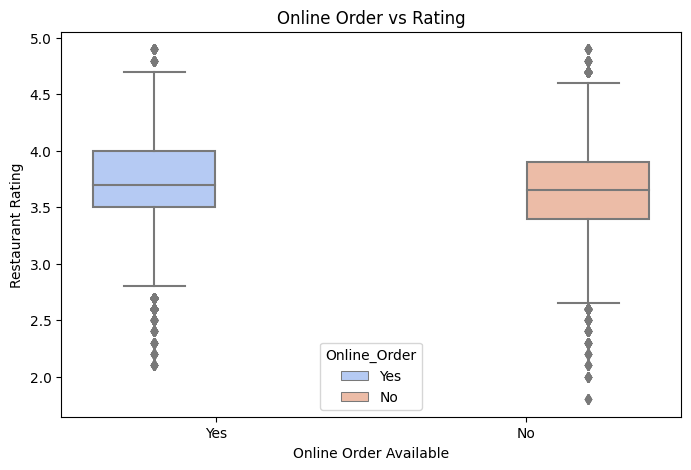

In [29]:
plt.figure(figsize=(8, 5))
sns.boxplot(x='Online_Order',y='Rating_out_of_5',data=df,hue='Online_Order',palette="coolwarm")
plt.xlabel("Online Order Available")
plt.ylabel("Restaurant Rating")
plt.title("Online Order vs Rating")
plt.show()

# Box_Plot --> Table Booking vs Rating.

To compare the average ratings of restaurants that allow Table Booking vs those that don’t.

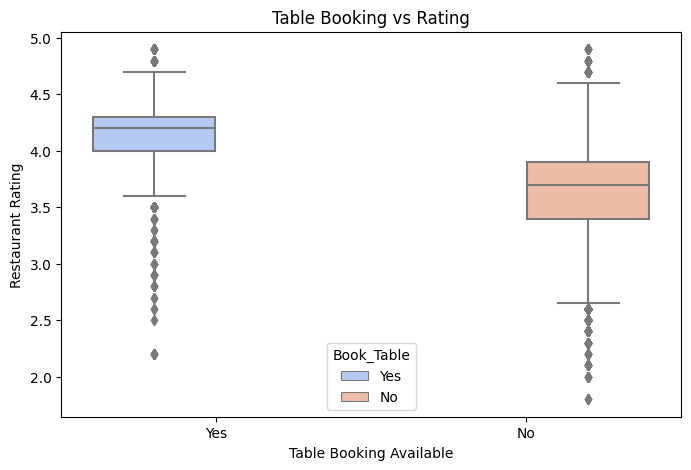

In [30]:
plt.figure(figsize=(8, 5))
sns.boxplot(x='Book_Table',y='Rating_out_of_5',data=df,hue='Book_Table',palette="coolwarm")
plt.xlabel("Table Booking Available")
plt.ylabel("Restaurant Rating")
plt.title("Table Booking vs Rating")
plt.show()

# Pie_Chart --> Proportion of online vs offline restaurants.

To have a quick overall view of how many restaurants support delivery vs those that don’t.

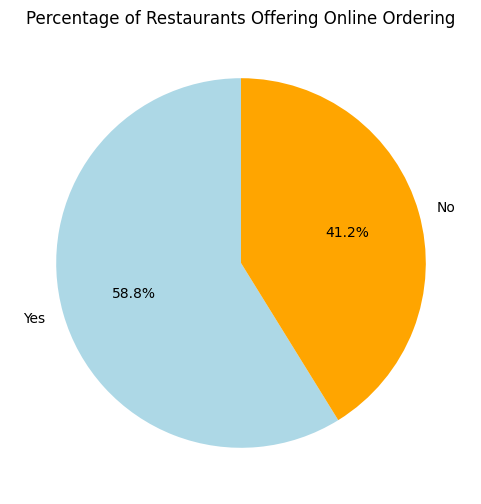

In [31]:
plt.figure(figsize=(6, 6))
plt.pie(online_order_counts,labels=online_order_counts.index,autopct='%1.1f%%',colors=['lightblue', 'orange'],startangle=90)
plt.title("Percentage of Restaurants Offering Online Ordering")
plt.show()

# Pie_Chart --> Proportion of Table Booking vs Non-Table Booking restaurants.

To have a quick overall view of how many restaurants support Table Booking vs those that don’t.

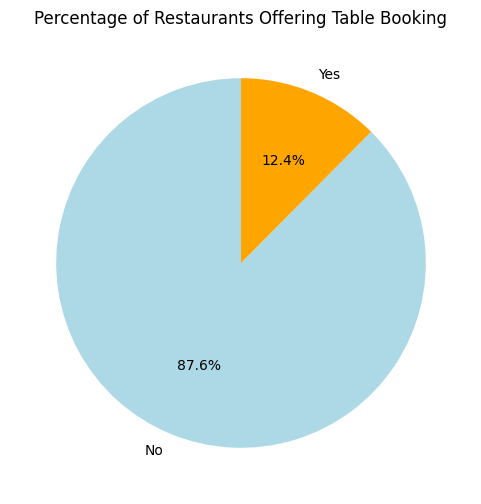

In [32]:
plt.figure(figsize=(6, 6))
plt.pie(table_booking_counts,labels=table_booking_counts.index,autopct='%1.1f%%',colors=['lightblue', 'orange'],startangle=90)
plt.title("Percentage of Restaurants Offering Table Booking")
plt.show()

# Stacked_Bar_Chart --> Shows how online ordering availability varies across different cities.

To identify which cities have more online-friendly restaurants and which are lagging behind.

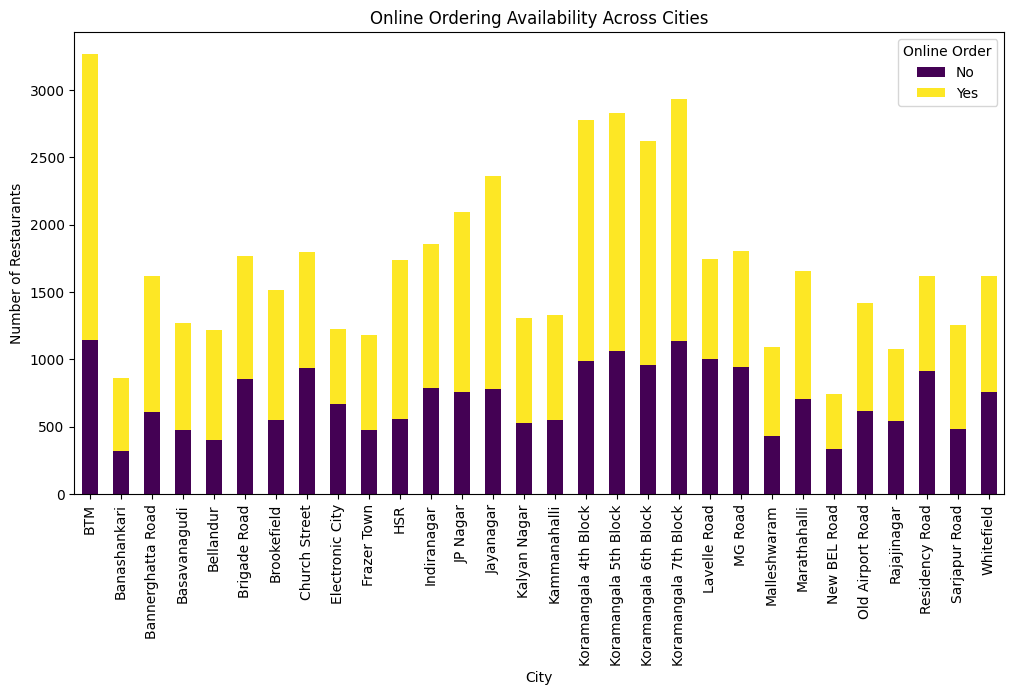

In [33]:
city_online_order = df.groupby(['City', 'Online_Order']).size().unstack()

city_online_order.plot(kind='bar',stacked=True,figsize=(12, 6),colormap='viridis')
plt.xlabel("City")
plt.ylabel("Number of Restaurants")
plt.title("Online Ordering Availability Across Cities")
plt.legend(title="Online Order", labels=['No', 'Yes'])
plt.xticks(rotation=90)
plt.show()

# Stacked_Bar_Chart --> Shows how table booking availability varies across different cities.

To identify which cities have more table booking available restaurants and which are lagging behind.

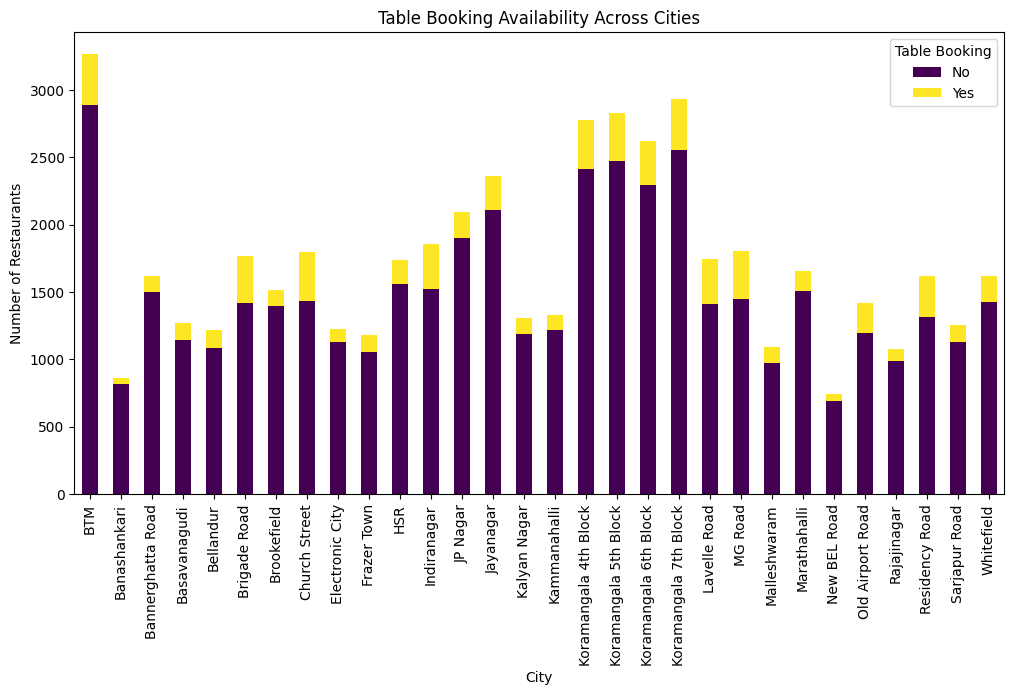

In [34]:
city_table_booking = df.groupby(['City', 'Book_Table']).size().unstack()

city_table_booking.plot(kind='bar',stacked=True,figsize=(12, 6),colormap='viridis')
plt.xlabel("City")
plt.ylabel("Number of Restaurants")
plt.title("Table Booking Availability Across Cities")
plt.legend(title="Table Booking", labels=['No', 'Yes'])
plt.xticks(rotation=90)
plt.show()

# Box_Plot --> Cost_for_two in online vs offline Restaurants.

To analyze if online restaurants are generally cheaper or more expensive.

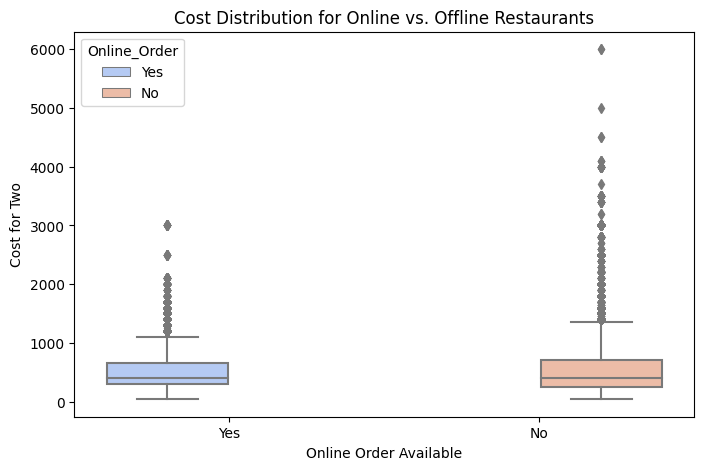

In [35]:
plt.figure(figsize=(8, 5))
sns.boxplot(x='Online_Order',y='Cost_for_two',data=df,hue='Online_Order',palette="coolwarm")
plt.xlabel("Online Order Available")
plt.ylabel("Cost for Two")
plt.title("Cost Distribution for Online vs. Offline Restaurants")
plt.show()

# Box_Plot --> Cost_for_two in Table booking vs Non-Table booking Restaurants.

To analyze if table booking restaurants are generally cheaper or more expensive.

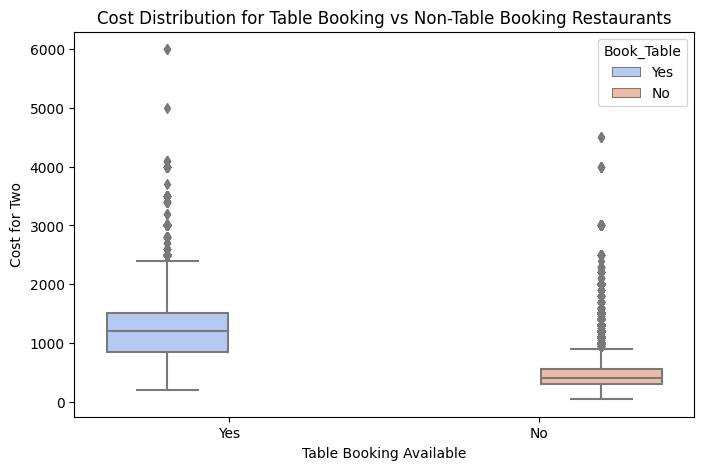

In [36]:
plt.figure(figsize=(8, 5))
sns.boxplot(x='Book_Table',y='Cost_for_two',data=df,hue='Book_Table',palette="coolwarm")
plt.xlabel("Table Booking Available")
plt.ylabel("Cost for Two")
plt.title("Cost Distribution for Table Booking vs Non-Table Booking Restaurants")
plt.show()

# Scatter_Plot --> Cost vs Rating.

To find the locations where you get the best-rated food at a lower cost.

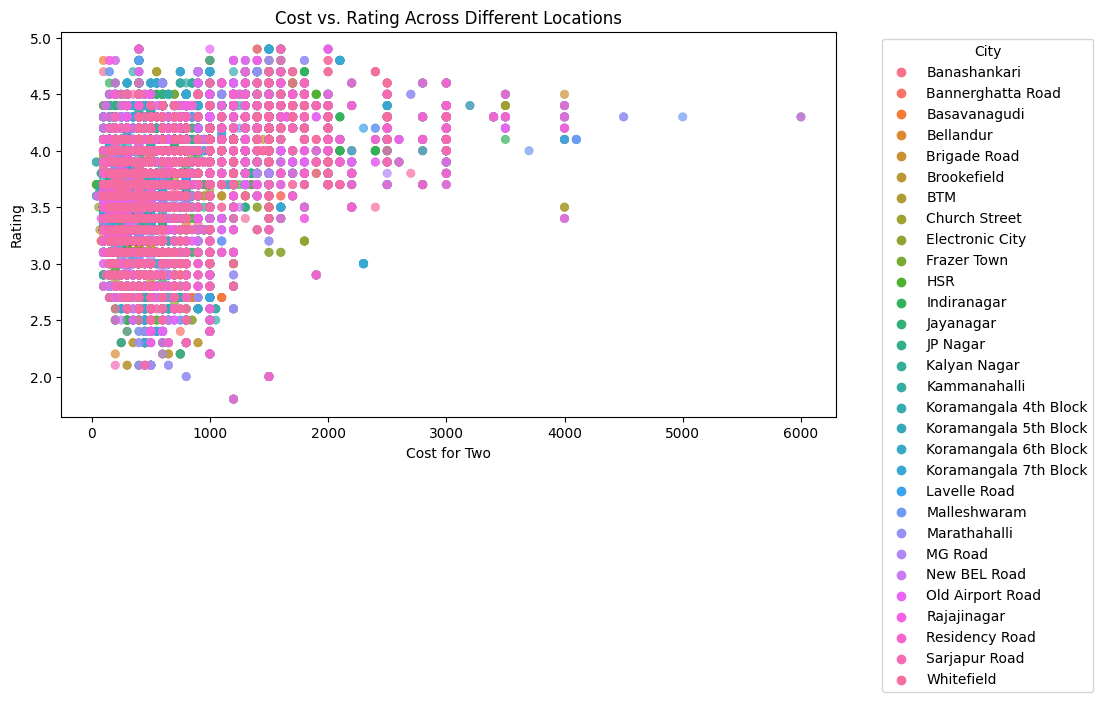

In [37]:
plt.figure(figsize=(10, 5))
sns.scatterplot(data=df, x='Cost_for_two', y='Rating_out_of_5', hue='City', alpha=0.7, edgecolor=None)
plt.xlabel("Cost for Two")
plt.ylabel("Rating")
plt.title("Cost vs. Rating Across Different Locations")
plt.legend(title="City", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

# Bar_Chart --> Avg. Rating vs City

To identify locations with good restaurant reputations.

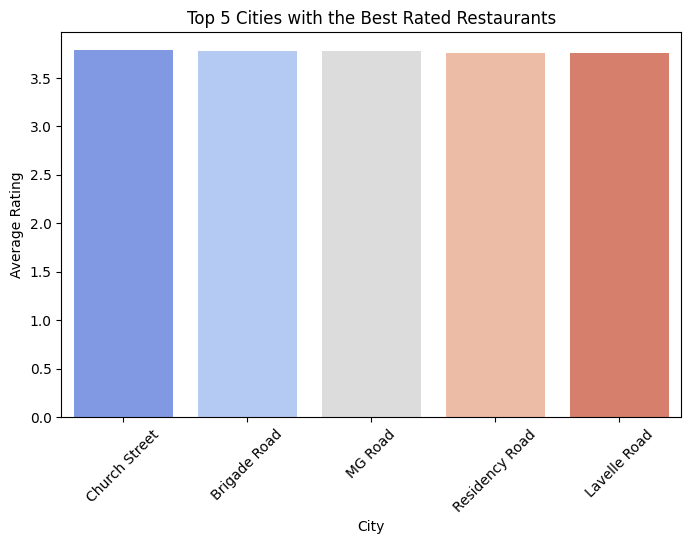

In [38]:
city_ratings = df.groupby('City')['Rating_out_of_5'].mean().sort_values(ascending=False).head(5)

plt.figure(figsize=(8,5))
sns.barplot(x=city_ratings.index, y=city_ratings.values, palette="coolwarm")
plt.xlabel("City")
plt.ylabel("Average Rating")
plt.title("Top 5 Cities with the Best Rated Restaurants")
plt.xticks(rotation=45)
plt.show()

# Bar_Chart --> Cost for two vs Restaurant type.

To identify which types of restaurants are generally more expensive.

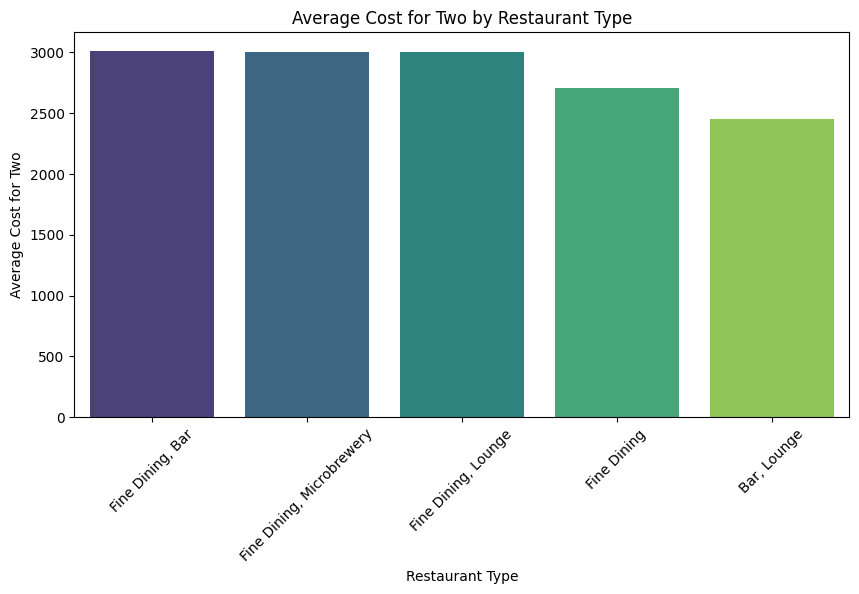

In [39]:
restaurant_type_cost = df.groupby('Restaurant_Type')['Cost_for_two'].mean().sort_values(ascending=False).head(5)

plt.figure(figsize=(10, 5))
sns.barplot(x=restaurant_type_cost.index, y=restaurant_type_cost.values, palette="viridis")
plt.xlabel("Restaurant Type")
plt.ylabel("Average Cost for Two")
plt.title("Average Cost for Two by Restaurant Type")
plt.xticks(rotation=45)
plt.show()

# Bar_Chart --> Count of restaurant by service type.

To identify which service type dominates the market.

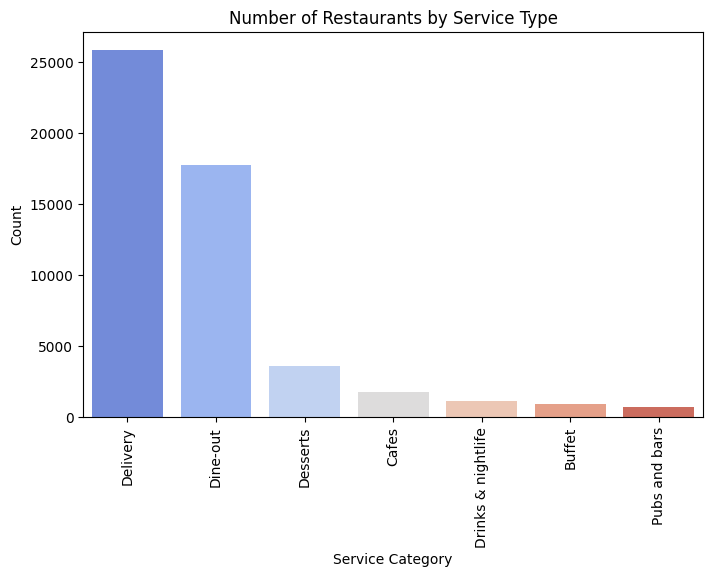

In [40]:
plt.figure(figsize=(8, 5))
sns.countplot(x=df['Service_Category'], order=df['Service_Category'].value_counts().index, palette="coolwarm")
plt.xlabel("Service Category")
plt.ylabel("Count")
plt.title("Number of Restaurants by Service Type")
plt.xticks(rotation=90)
plt.show()

# Bar_Chart --> Count of restaurant in each city.

To identify which areas have the highest number of restaurants.

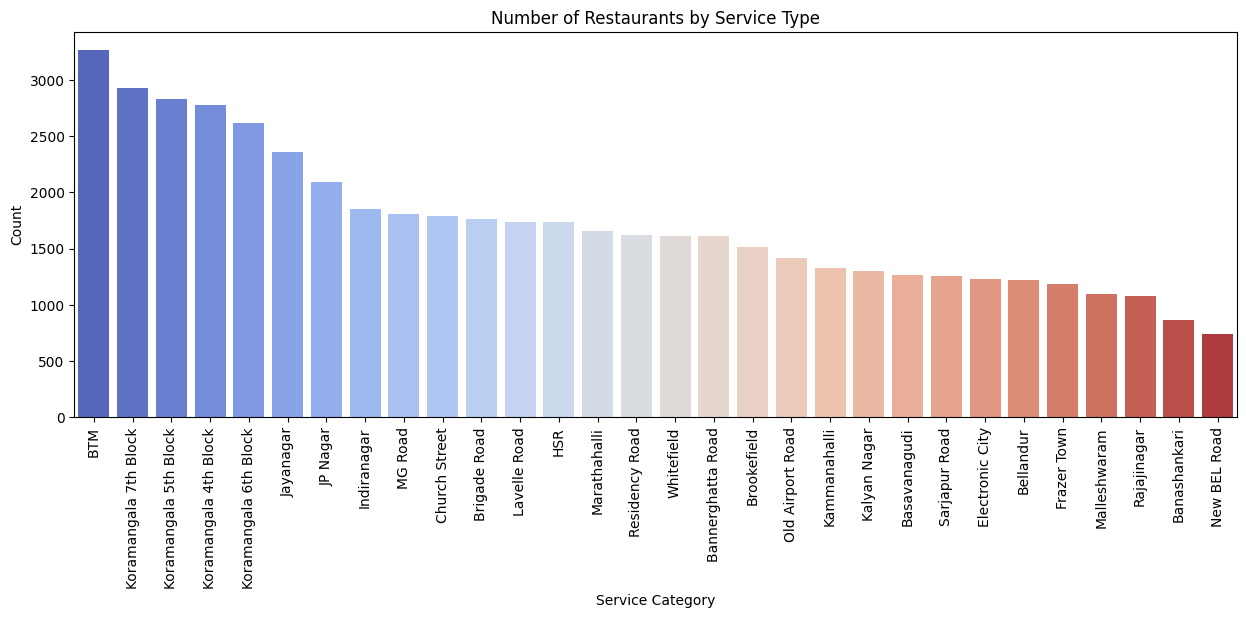

In [41]:
plt.figure(figsize=(15, 5))
sns.countplot(x=df['City'], order=df['City'].value_counts().index, palette="coolwarm")
plt.xlabel("Service Category")
plt.ylabel("Count")
plt.title("Number of Restaurants by Service Type")
plt.xticks(rotation=90)
plt.show()

# Bar_Chart --> To Identify the most popular chains based on total votes received.

More votes generally mean a well-known and frequently visited chain.

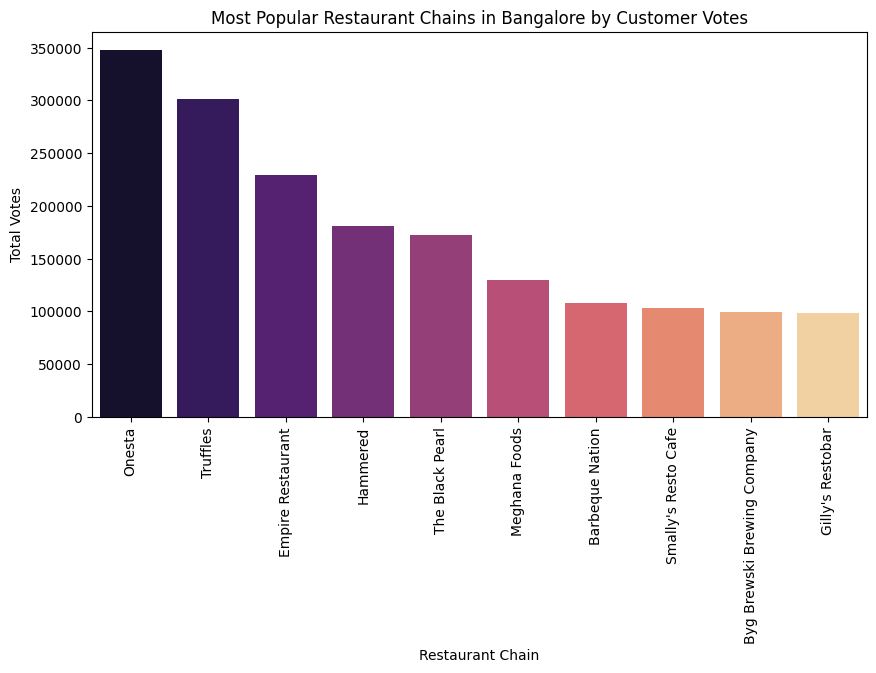

In [42]:
chain_votes = df.groupby('Restaurant_Name')['Customer_rated'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(10, 5))
sns.barplot(y=chain_votes.values, x=chain_votes.index, palette="magma")
plt.xlabel("Restaurant Chain")
plt.ylabel("Total Votes")
plt.title("Most Popular Restaurant Chains in Bangalore by Customer Votes")
plt.xticks(rotation=90)
plt.show()